# DATA SCIENCE MAJOR PROJECT


NAME - **N.JAYAMANIKANTA**

BATCH - **APRIL-MAY**

# Problem 
The data is related to direct marketing campaigns(phone calls)of a Portugese banking institution. The marketing
campaigns were based on phone calls. Often, more than one contact to the same client was required, in
order to assess if the product (bank term deposit) would be ('yes') or not ('no') .The classification goal is to predict the if the client will subscribe to a term deposit(variable y).






1)First we are importing the necessary files that are required for our model

In [2]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from collections import Counter
import category_encoders as ce
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

2)Now we are import our bank dataset from our computer and converting the file into DataFrame

In [5]:
df=pd.read_csv(r"/bank-full (1).csv",sep=";")
df.rename(columns={'y':'target'},inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
df.shape

(45211, 17)

 Columns of the dataset


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

3) Now we are checking whether there is any null value in any of the data of column

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
target       object
dtype: object

4) Now we are designing a function which will print all the necessary information of our datasets

In [10]:
def dataset_info(df):
    if isinstance(df,pd.DataFrame):
        is_na=df.isna().sum().sum()
        print("Datatype shape =",df.shape)
        print("any null values =",is_na,"\n")
        col=df.columns
        datatype=df.dtypes
        uniq=df.nunique()
        print("\033[1m","S.NO "," column","  datatype","uniquedata","\n")
        for i in range(len(df.columns)):
            print("%d %10s %10s %10s" %(i+1,col[i],datatype[i],uniq[i]))






In [11]:
dataset_info(df)

Datatype shape = (45211, 17)
any null values = 0 

 S.NO   column   datatype uniquedata 

1        age      int64         77
2        job     object         12
3    marital     object          3
4  education     object          4
5    default     object          2
6    balance      int64       7168
7    housing     object          2
8       loan     object          2
9    contact     object          3
10        day      int64         31
11      month     object         12
12   duration      int64       1573
13   campaign      int64         48
14      pdays      int64        559
15   previous      int64         41
16   poutcome     object          4
17     target     object          2


In [12]:
catagorical_data=[j for j in df.columns if df[j].dtype=="O"]
print("keys with catagorical dataset are : ","\033[1m" ,catagorical_data)
num=[k for k in df.columns if df[k].dtype!="O"]
print("\033[0m", "keys with numerical dataset are :""\033[1m",num)


keys with catagorical dataset are :   ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'target']
 keys with numerical dataset are : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# EDA of attributes
1)AGE

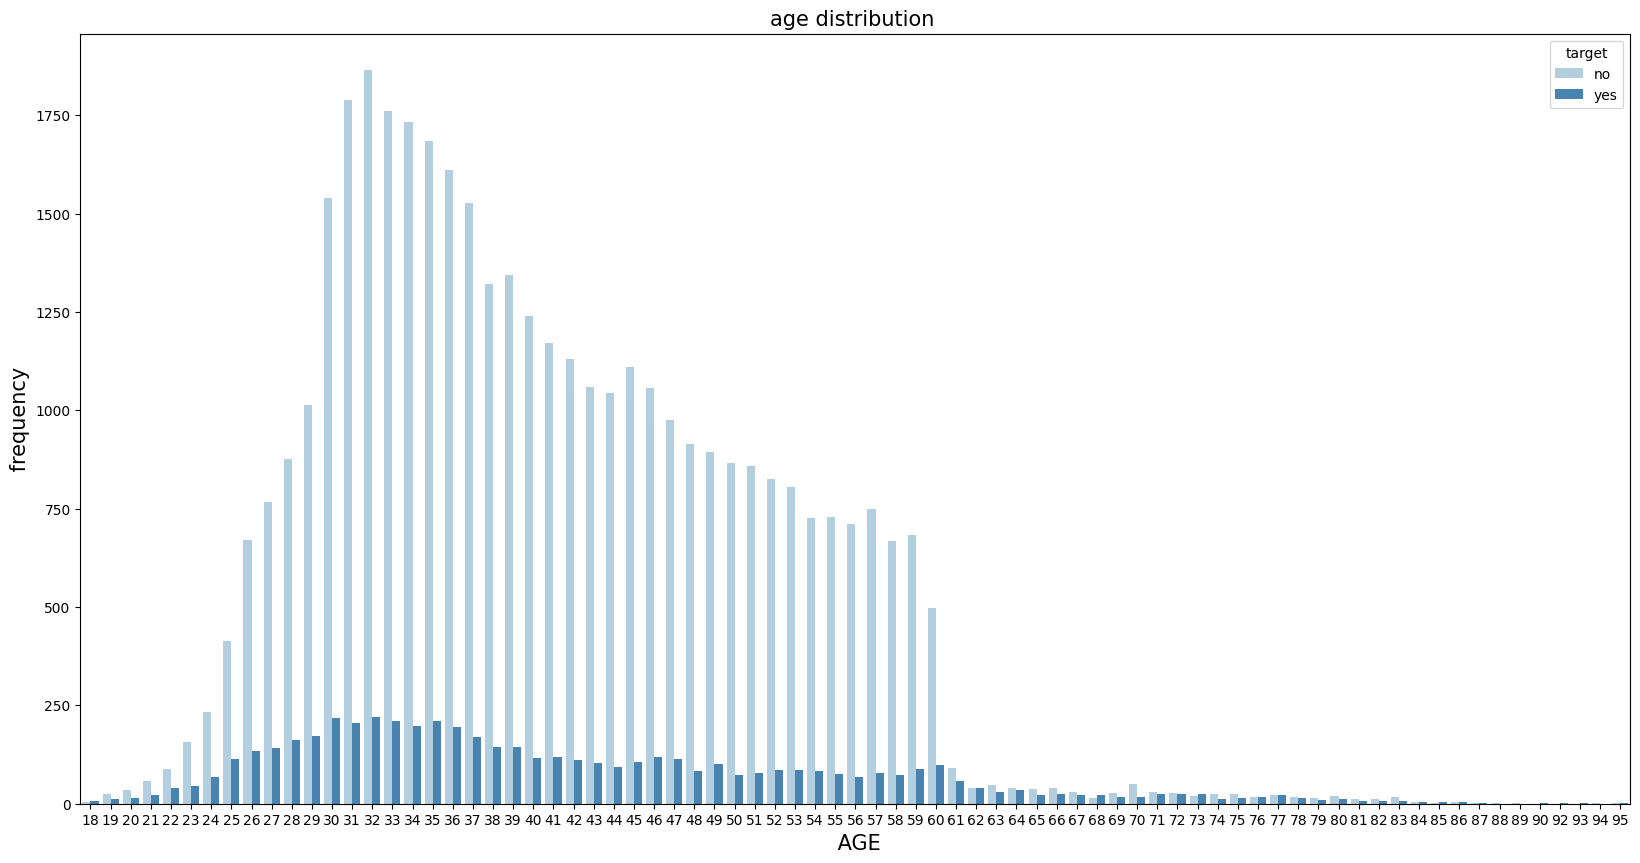

In [13]:
import seaborn as sns
plot=plt.subplots(figsize=(20,10))
sns.countplot(x='age',data=df ,hue = 'target',palette="Blues")
plt.title("age distribution ",fontsize=15)
plt.xlabel(" AGE" ,fontsize=15)
plt.ylabel(" frequency ",fontsize=15)
plt.show()


<Axes: xlabel='age', ylabel='Frequency'>

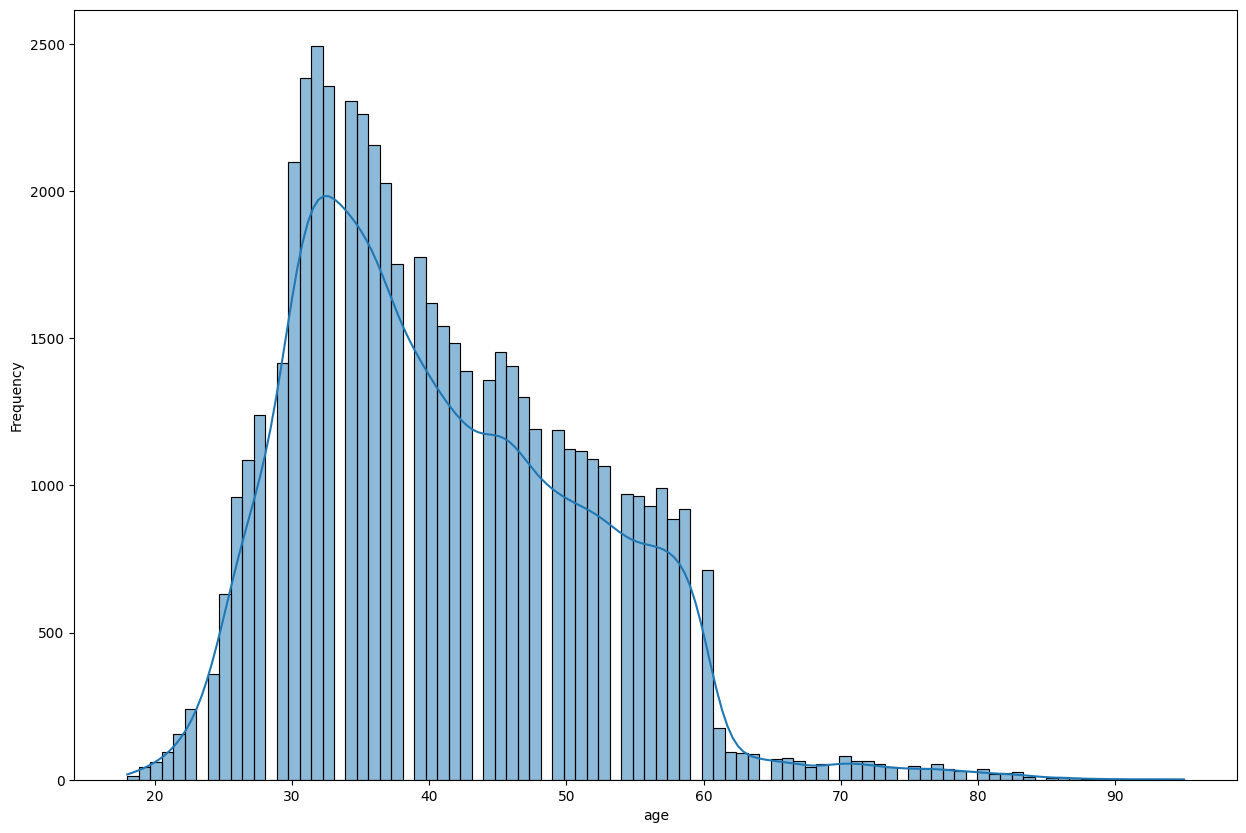

In [14]:
hist=plt.subplots(figsize=(15,10))
sns.histplot(data=df,x='age',stat='frequency',kde=True)

# II JOB


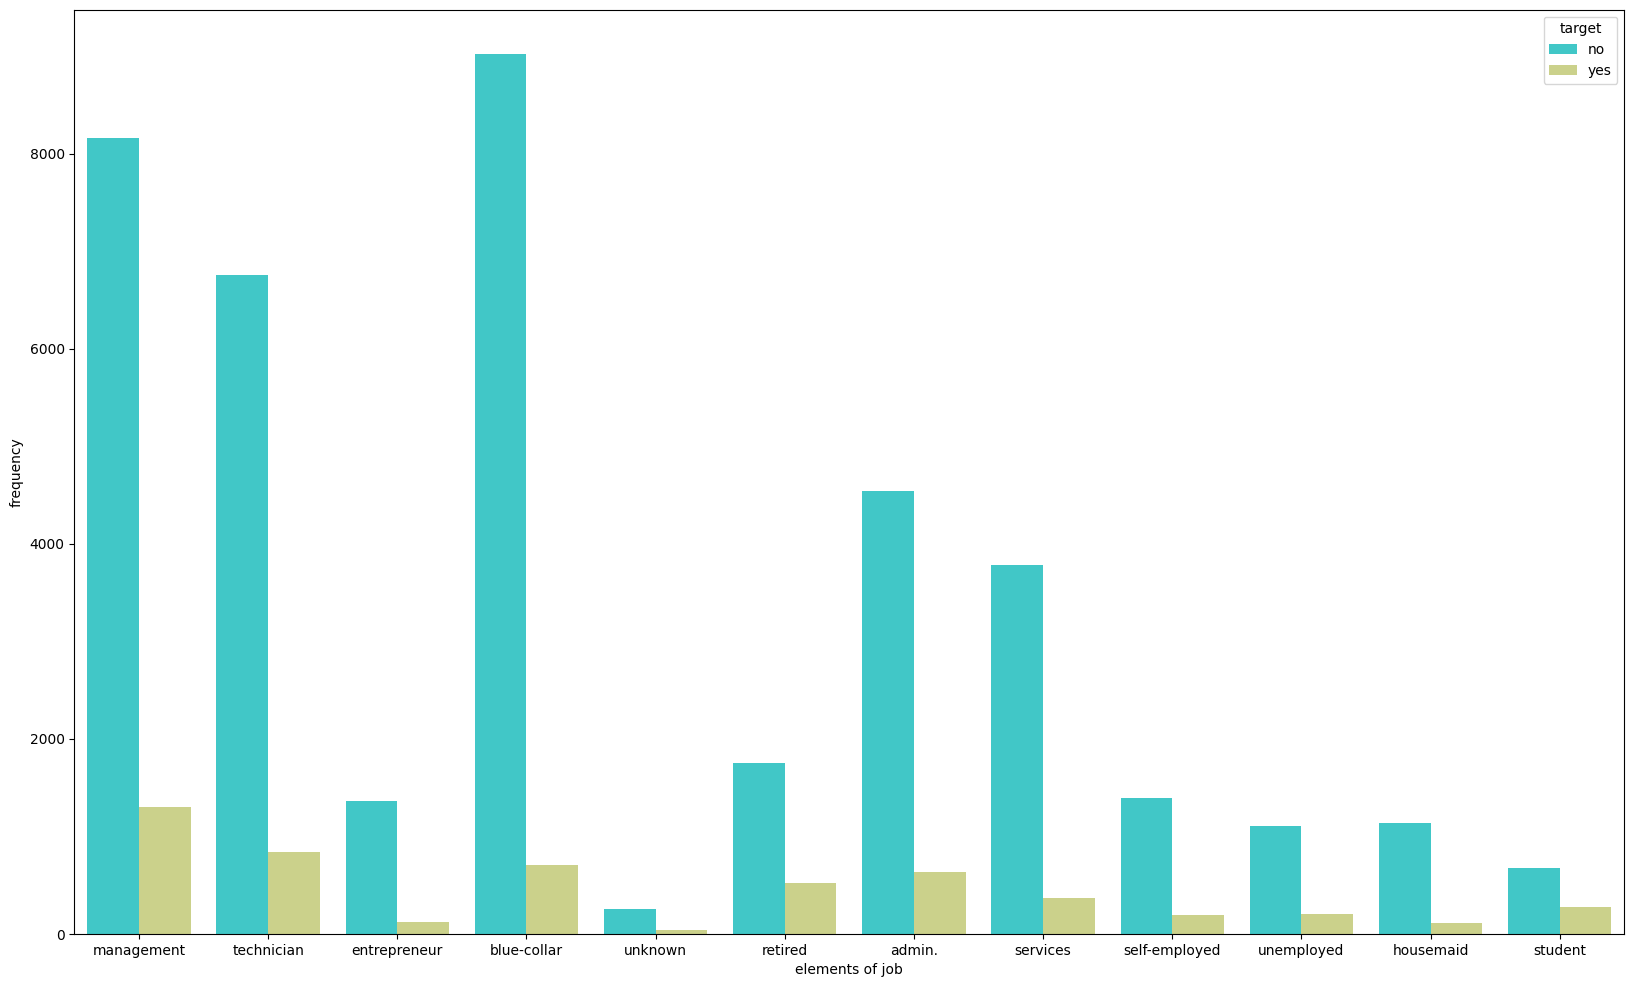

Counter({'blue-collar': 9732, 'management': 9458, 'technician': 7597, 'admin.': 5171, 'services': 4154, 'retired': 2264, 'self-employed': 1579, 'entrepreneur': 1487, 'unemployed': 1303, 'housemaid': 1240, 'student': 938, 'unknown': 288})


In [15]:
plt.figure(figsize=(20,12))
sns.countplot(x='job',data=df,hue = 'target',palette='rainbow')
plt.xlabel("elements of job")
plt.ylabel("frequency")
plt.show()
df['job'].unique()
print(Counter(df['job']))

# Marital

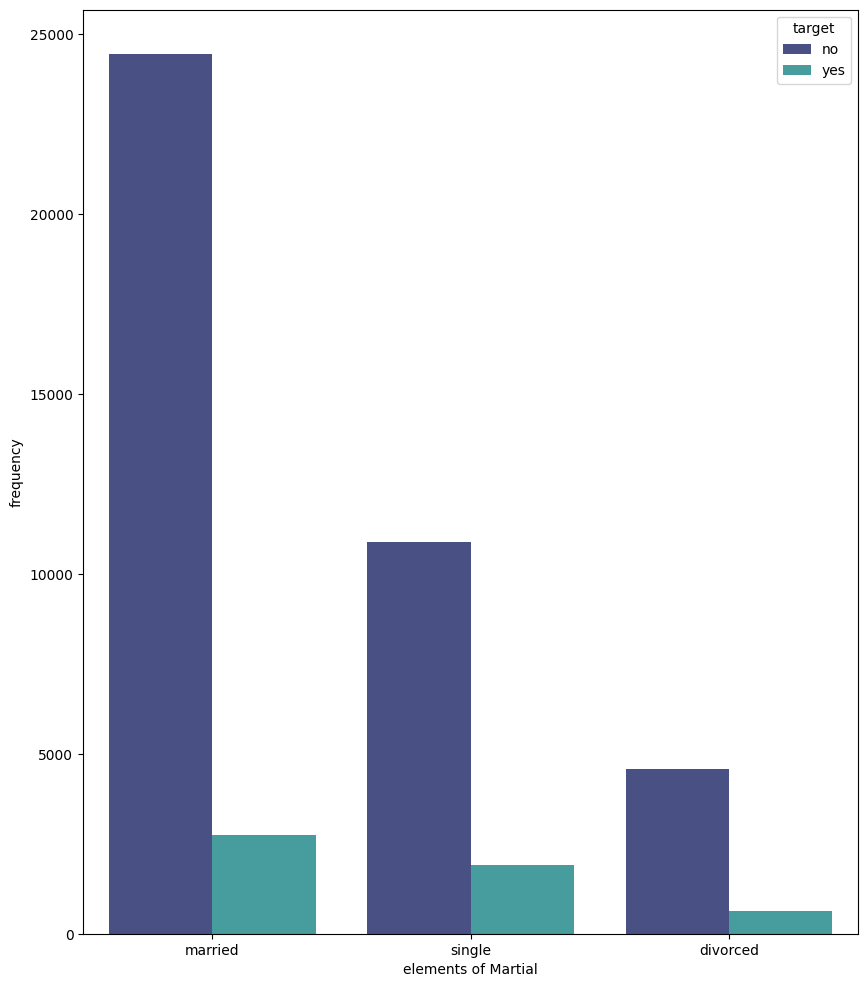

Counter({'married': 27214, 'single': 12790, 'divorced': 5207})

In [16]:
plt.figure(figsize=(10,12))
sns.countplot(x='marital' ,data=df,hue='target',palette='mako')
plt.xlabel("elements of Martial")
plt.ylabel("frequency")
plt.show()
df['marital'].unique()
z=Counter(df['marital'])
z

# Education

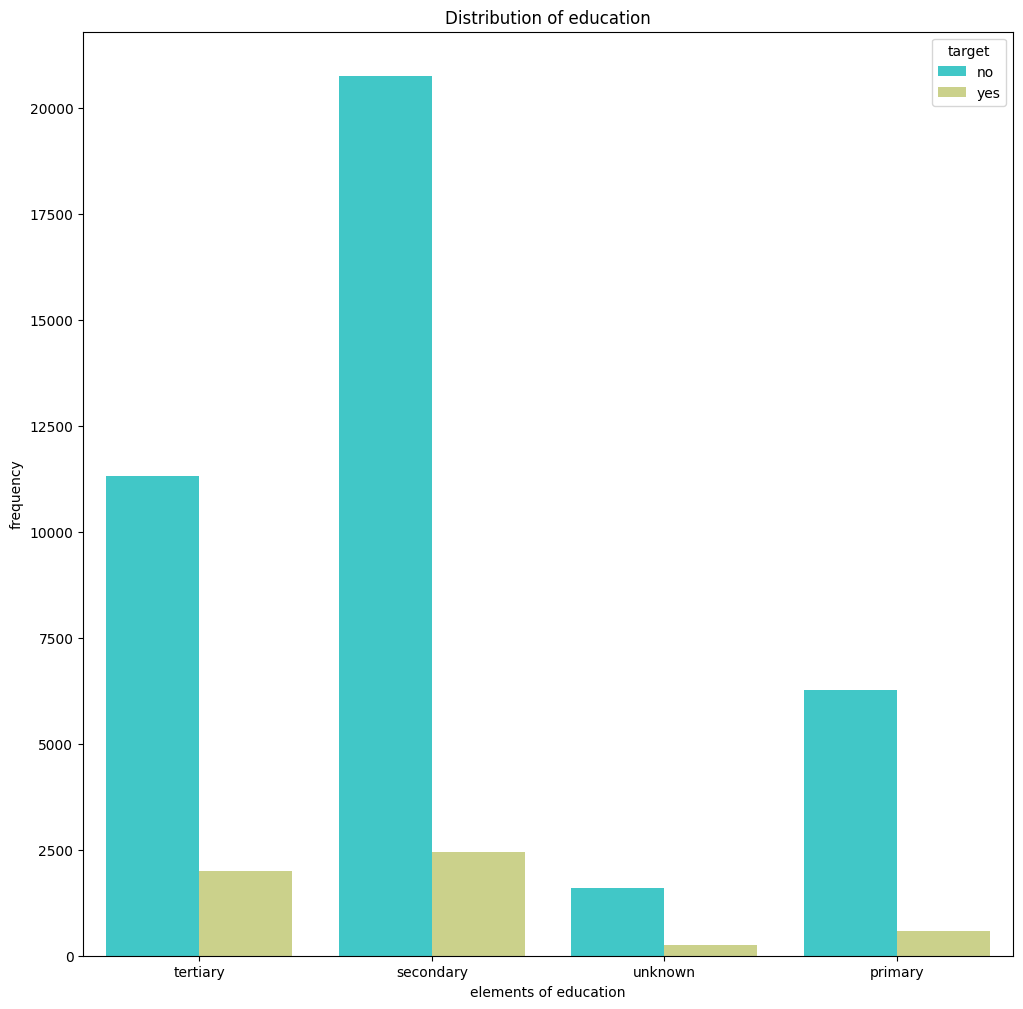

Counter({'secondary': 23202, 'tertiary': 13301, 'primary': 6851, 'unknown': 1857})


In [17]:
plt.figure(figsize=(12,12))
sns.countplot(x='education' ,data=df,hue='target',palette='rainbow')
plt.title("Distribution of education")
plt.xlabel("elements of education")
plt.ylabel("frequency")
plt.show()
print(Counter(df['education']))

# Default

<ipython-input-18-f08854ff25bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default' ,data=df,palette='rainbow')


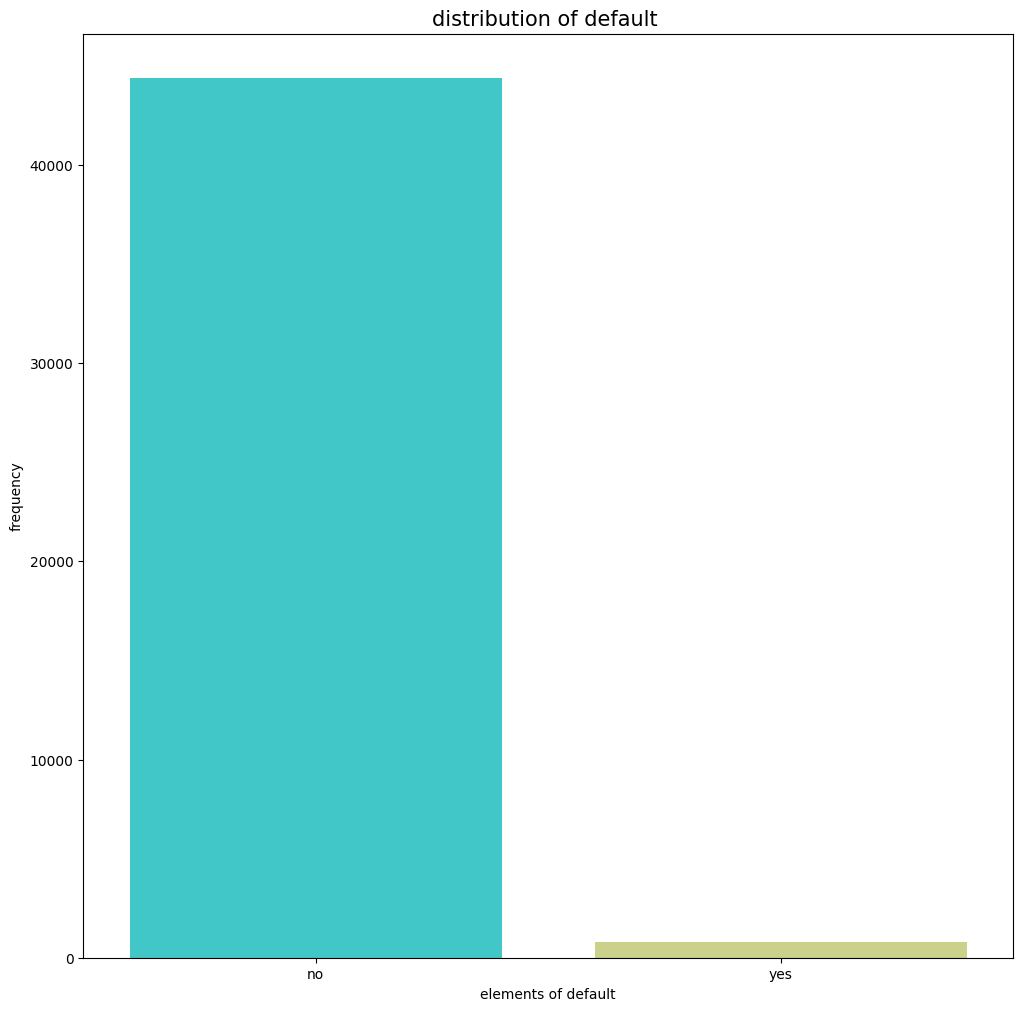

Counter({'no': 44396, 'yes': 815})

In [18]:
plt.figure(figsize=(12,12))
sns.countplot(x='default' ,data=df,palette='rainbow')
plt.title("distribution of default ",fontsize=15)
plt.xlabel("elements of default")
plt.ylabel("frequency")
plt.show()

df['default'].unique()
z=Counter(df['default'])
z

# Housing

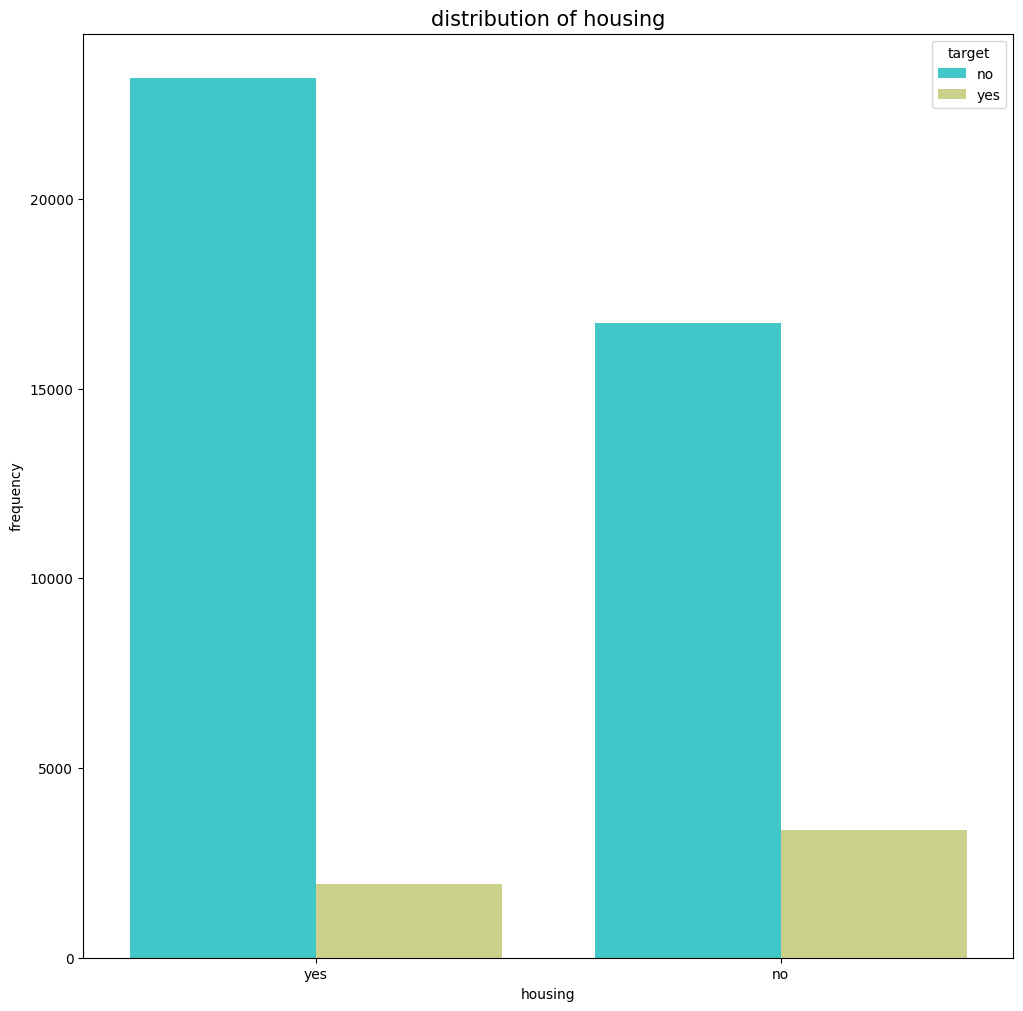

Counter({'yes': 25130, 'no': 20081})

In [21]:
plt.figure(figsize=(12,12))
sns.countplot(x='housing' ,data=df,hue='target',palette='rainbow')
plt.xlabel("housing")
plt.ylabel("frequency")
plt.title("distribution of housing",fontsize=15)
plt.show()

df['housing'].unique()
z=Counter(df['housing'])
z


# Loan

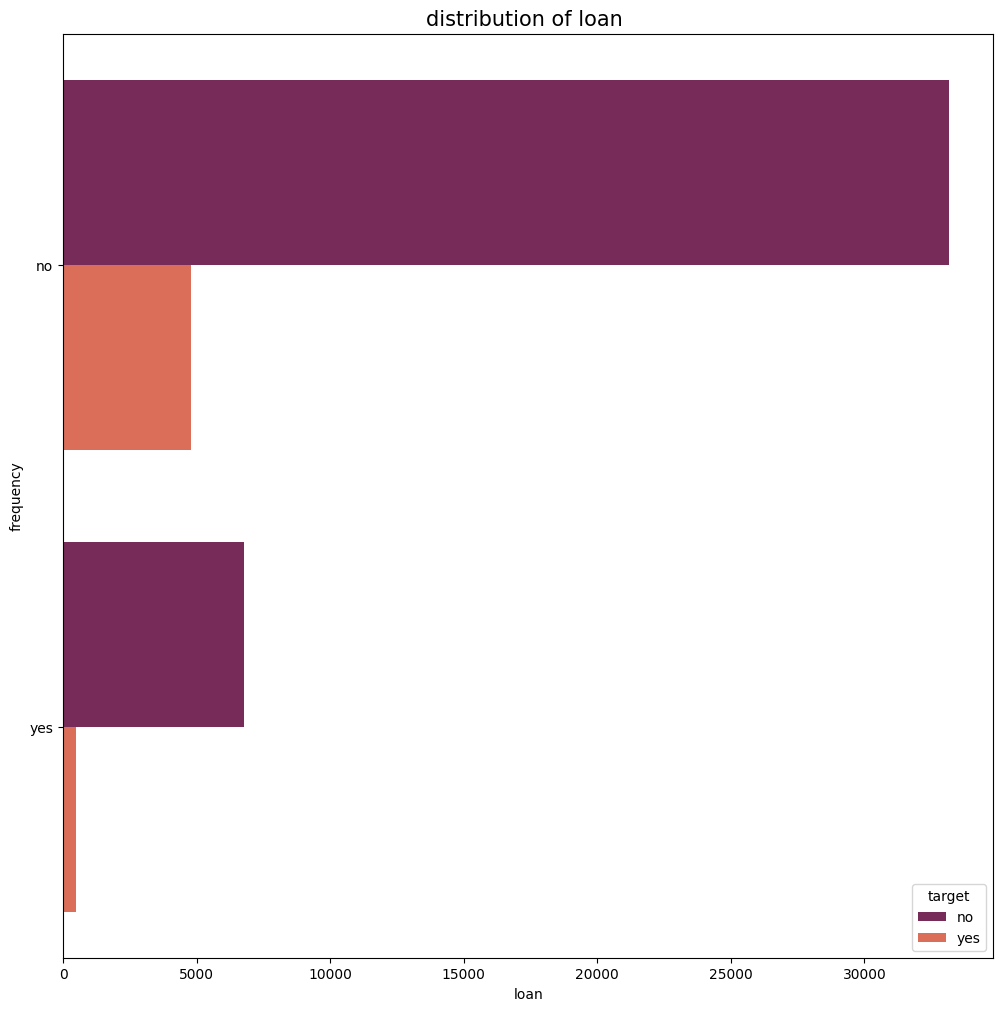

Counter({'no': 37967, 'yes': 7244})

In [22]:
plt.figure(figsize=(12,12))
sns.countplot(y='loan' ,data=df,hue='target',palette='rocket')
plt.xlabel("loan")
plt.ylabel("frequency")
plt.title("distribution of loan ",fontsize=15)
plt.show()

df['loan'].unique()
z=Counter(df['loan'])
z


# Days

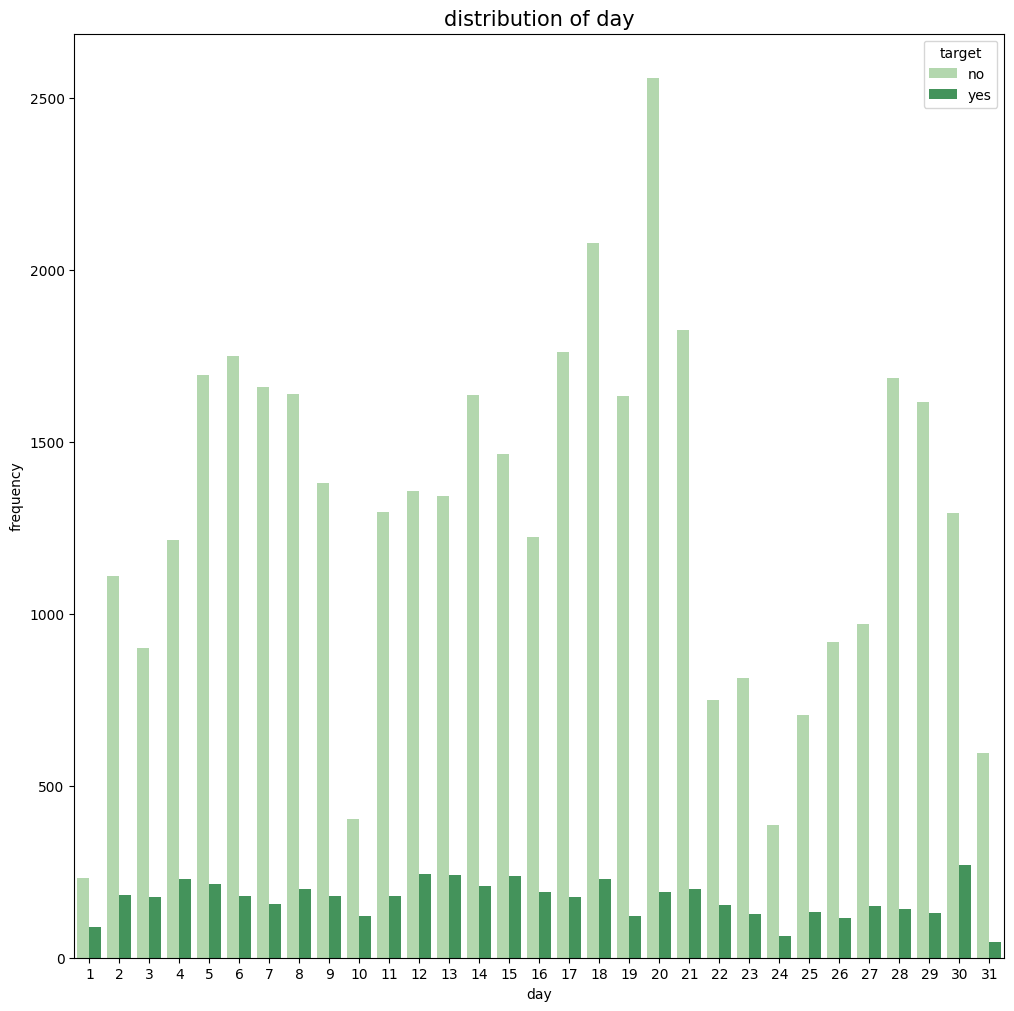

Counter({5: 1910,
         6: 1932,
         7: 1817,
         8: 1842,
         9: 1561,
         12: 1603,
         13: 1585,
         14: 1848,
         15: 1703,
         16: 1415,
         19: 1757,
         20: 2752,
         21: 2026,
         23: 939,
         26: 1035,
         27: 1121,
         28: 1830,
         29: 1745,
         30: 1566,
         2: 1293,
         3: 1079,
         4: 1445,
         11: 1479,
         17: 1939,
         18: 2308,
         24: 447,
         25: 840,
         1: 322,
         10: 524,
         22: 905,
         31: 643})

In [25]:
plt.figure(figsize=(12,12))
sns.countplot(x='day' ,data=df,hue='target',palette='Greens')
plt.xlabel("day")
plt.ylabel("frequency")
plt.title("distribution of day",fontsize=15)
plt.show()

df['day'].unique()
z=Counter(df['day'])
z


# Month

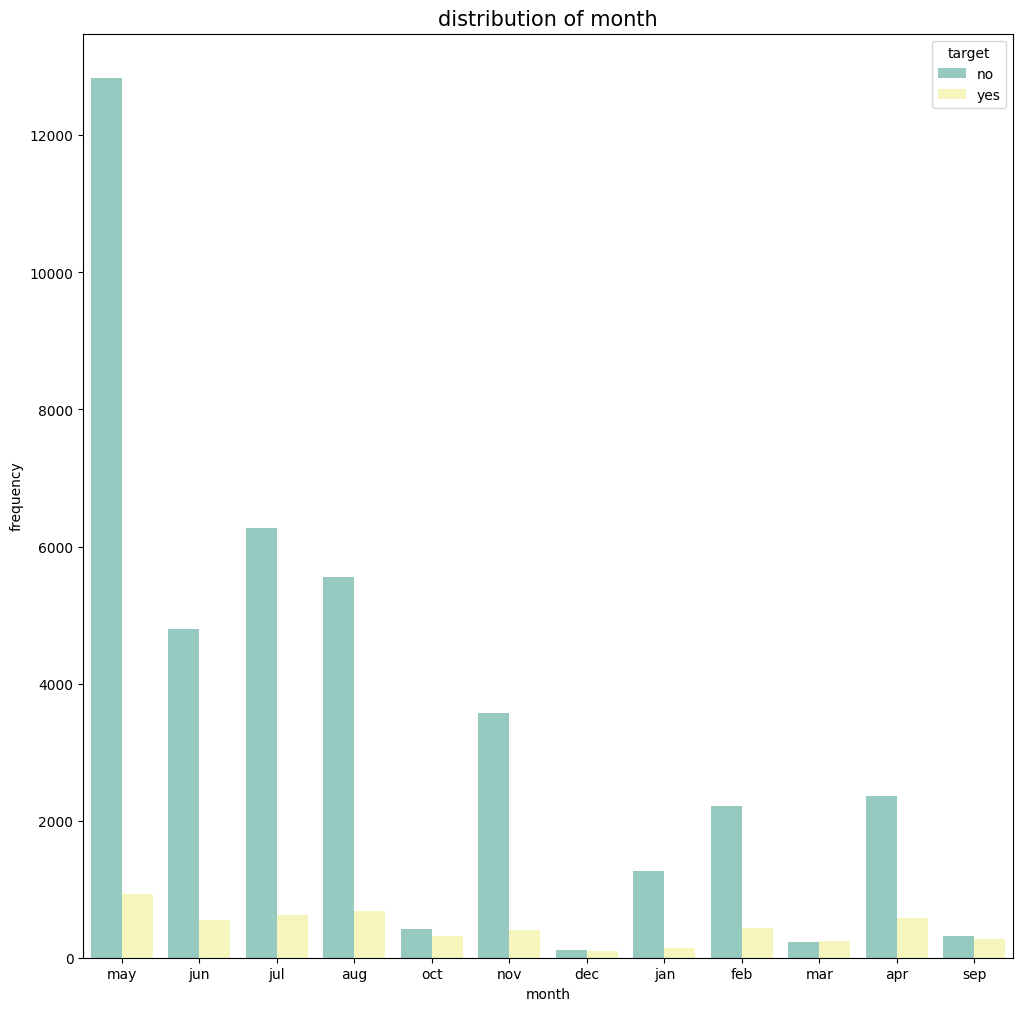

Counter({'may': 13766,
         'jun': 5341,
         'jul': 6895,
         'aug': 6247,
         'oct': 738,
         'nov': 3970,
         'dec': 214,
         'jan': 1403,
         'feb': 2649,
         'mar': 477,
         'apr': 2932,
         'sep': 579})

In [30]:
plt.figure(figsize=(12,12))
sns.countplot(x='month' ,data=df,hue='target',palette='Set3')
plt.xlabel("month")
plt.ylabel("frequency")
plt.title("distribution of month",fontsize=15)
plt.show()

df['housing'].unique()
z=Counter(df['month'])
z


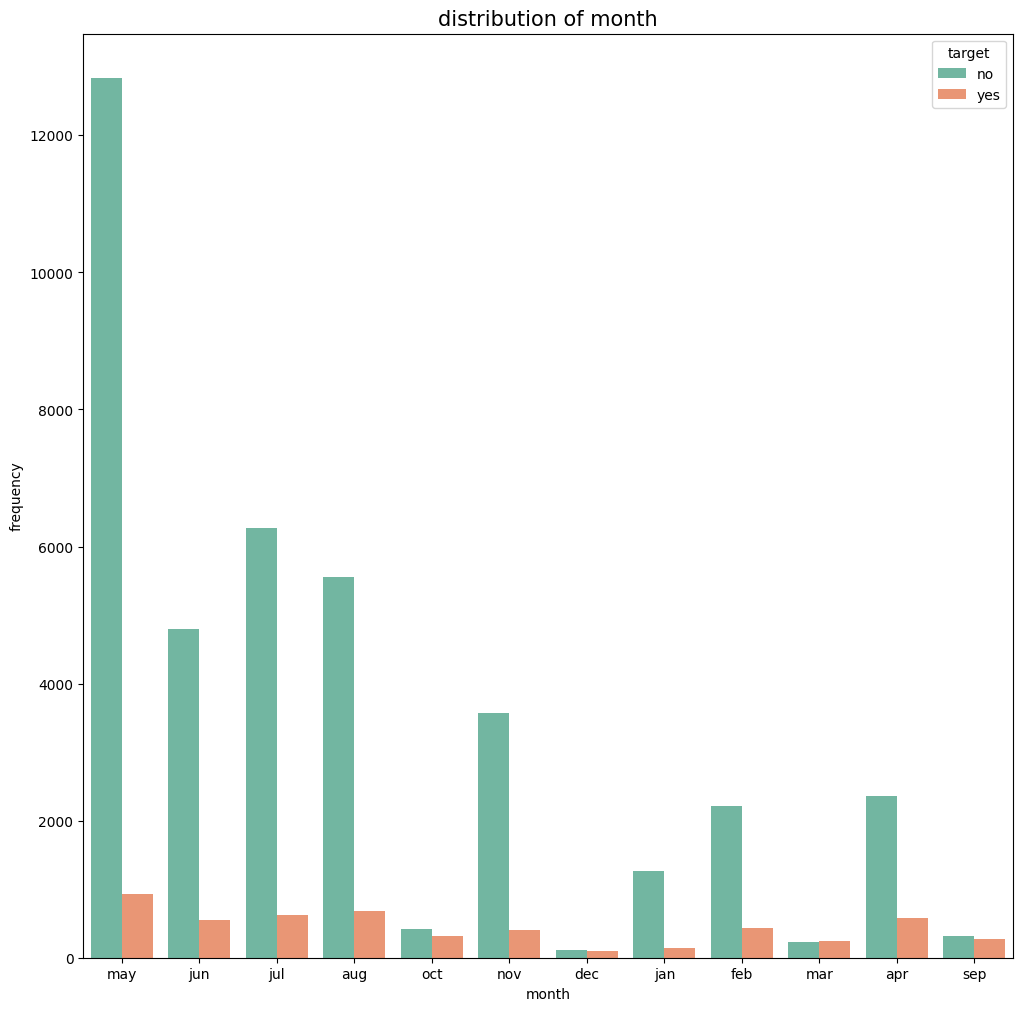

Counter({'may': 13766,
         'jun': 5341,
         'jul': 6895,
         'aug': 6247,
         'oct': 738,
         'nov': 3970,
         'dec': 214,
         'jan': 1403,
         'feb': 2649,
         'mar': 477,
         'apr': 2932,
         'sep': 579})

In [31]:
plt.figure(figsize=(12,12))
sns.countplot(x='month',data=df,hue='target',palette='Set2')
plt.xlabel("month")
plt.ylabel("frequency")
plt.title("distribution of month",fontsize=15)
plt.show()

df['housing'].unique()
z=Counter(df['month'])
z


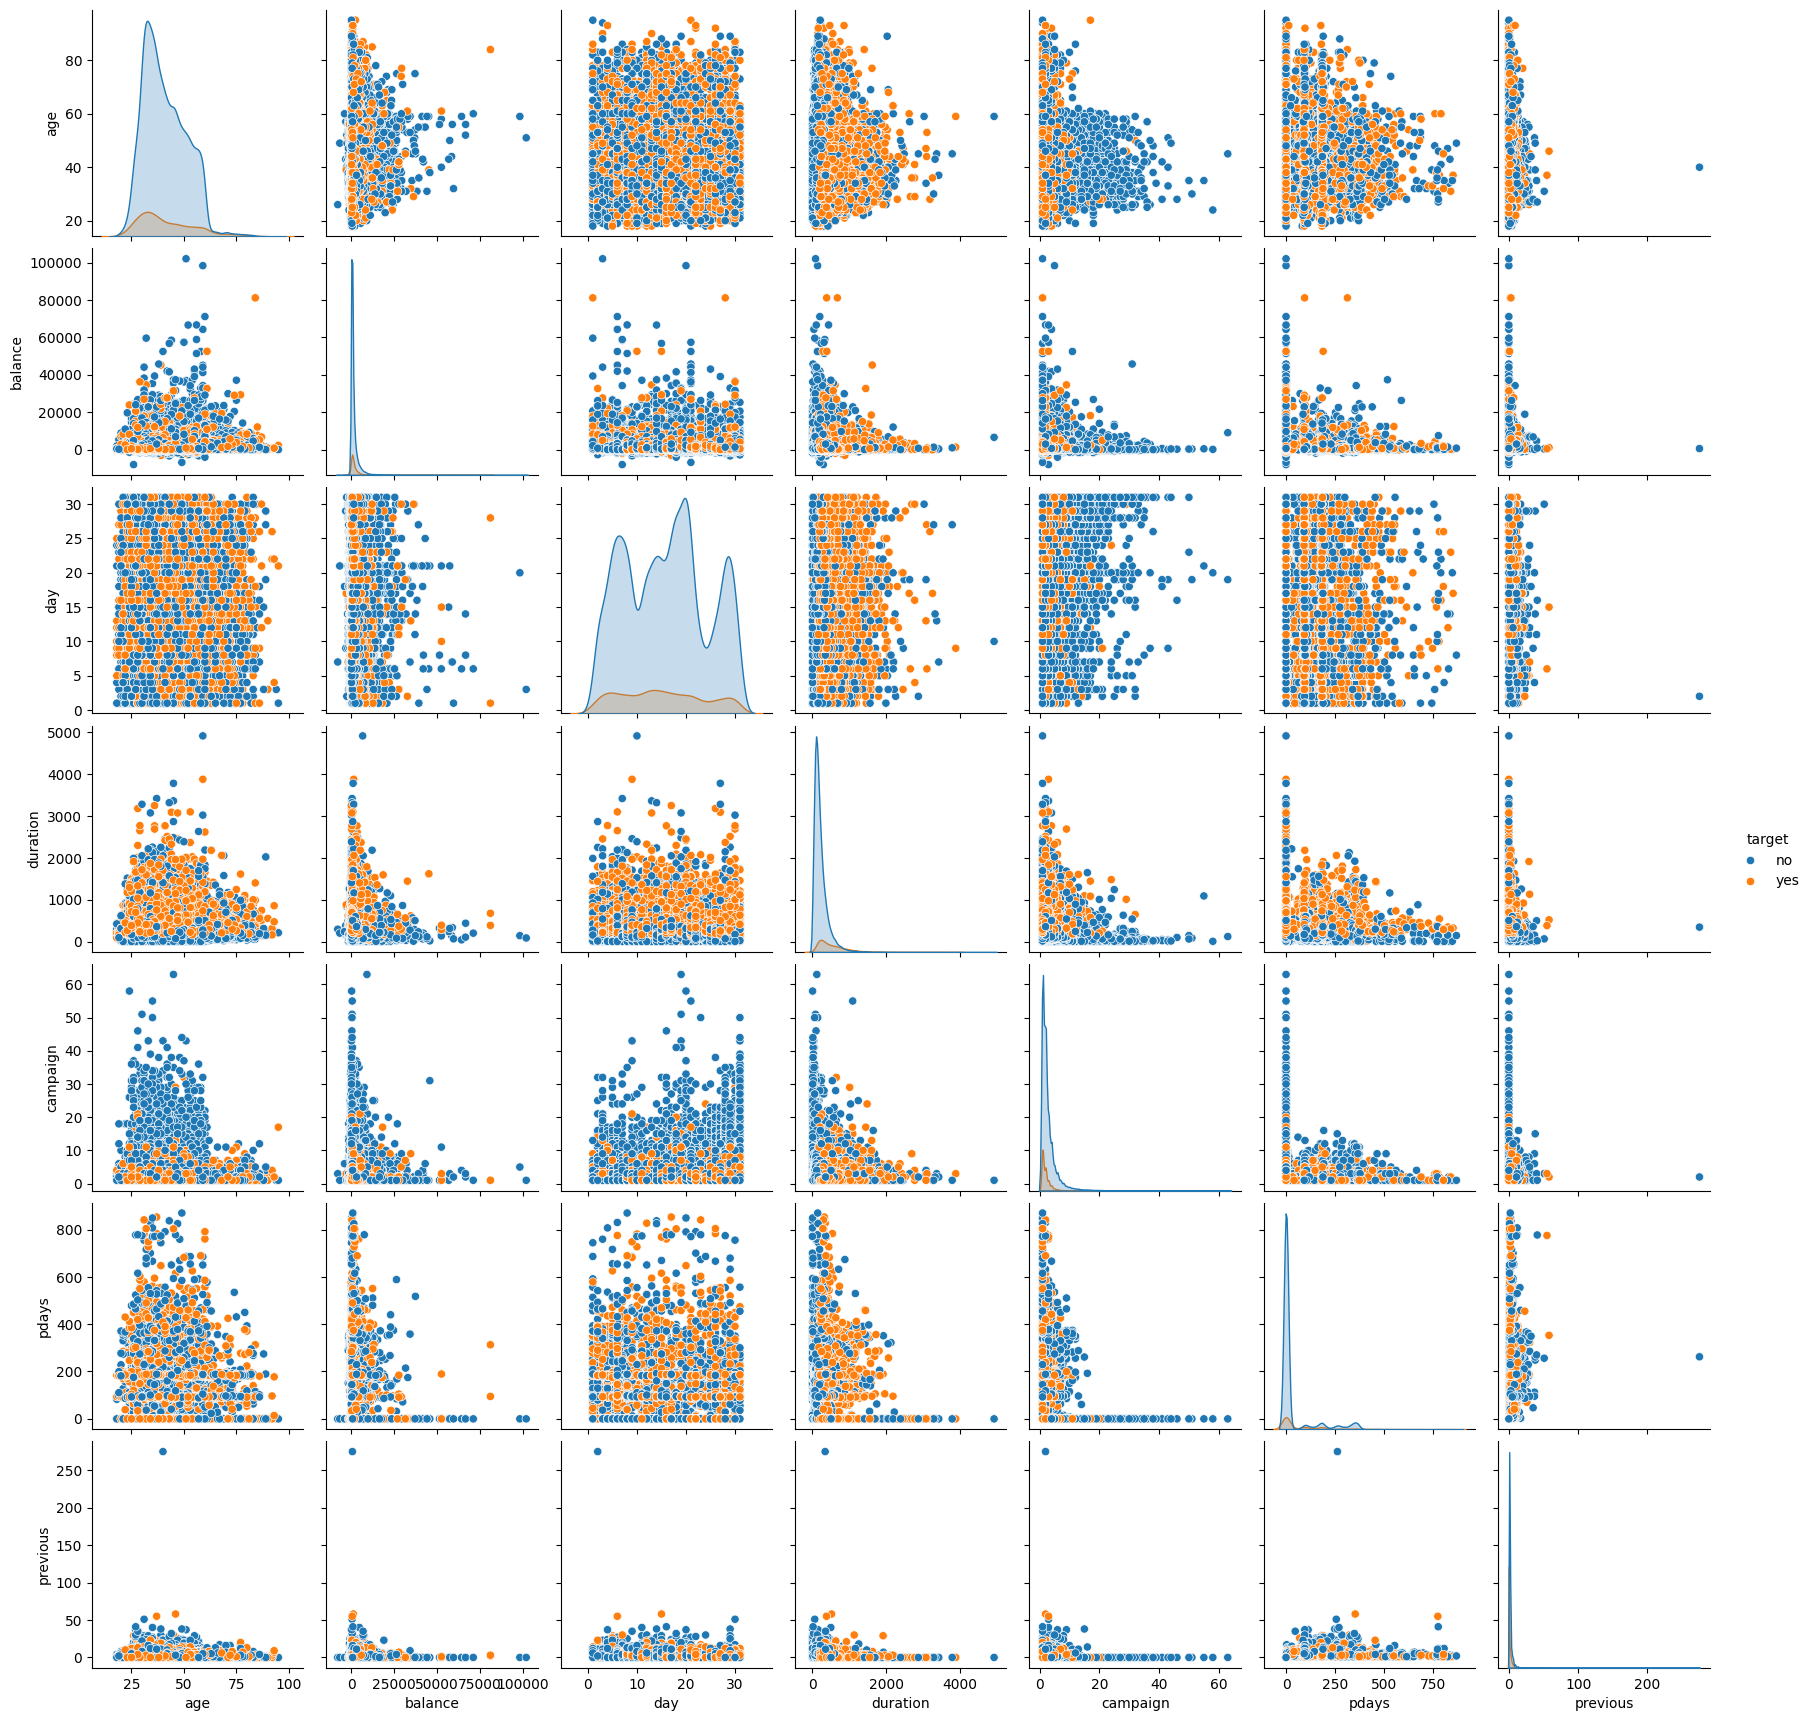

In [32]:
sns.pairplot(data=df,hue='target')

**6**) Now after observing all the attributes now we divide our data into for training and testing

In [33]:
df['target']=df['target'].map({'no':0,'yes':1})
x=df.drop(['target'],axis=1)
y=df['target']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

print("elements in X_train :",X_train.shape)
print("elements in  X_test :",X_test.shape)
print("elements in Y_train :",Y_train.shape)
print("elements in Y_test :",Y_test.shape)


elements in X_train : (36168, 16)
elements in  X_test : (9043, 16)
elements in Y_train : (36168,)
elements in Y_test : (9043,)


In [34]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6353,36,admin.,divorced,secondary,no,-37,yes,no,unknown,27,may,151,1,-1,0,unknown
14047,34,management,married,tertiary,no,161,yes,no,cellular,11,jul,378,1,-1,0,unknown
44780,72,admin.,married,primary,no,2321,no,no,cellular,14,sep,221,2,64,12,failure
17994,32,unemployed,married,tertiary,no,7,yes,no,cellular,30,jul,29,3,-1,0,unknown
21117,30,technician,married,secondary,no,289,yes,no,cellular,14,aug,1184,4,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21874,38,management,married,secondary,no,124,no,no,cellular,20,aug,202,2,-1,0,unknown
12333,42,blue-collar,married,secondary,no,160,yes,yes,unknown,26,jun,190,1,-1,0,unknown
32364,36,technician,single,secondary,no,2511,yes,no,cellular,16,apr,700,5,-1,0,unknown
29126,42,self-employed,single,secondary,no,924,no,no,cellular,2,feb,127,1,-1,0,unknown


As we can see there is categorcal dataset in our training model so first we have to convert it into numerical data for applying any algorithm

Now we have succesfully converted our categoricalc data into numerical data

In [38]:
encoder=ce.OrdinalEncoder(cols=['job','marital','education','default','housing','loan','contact','month','duration','poutcome'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6353,36,1,1,1,1,-37,1,1,1,27,1,1,1,-1,0,1
14047,34,2,2,2,1,161,1,1,2,11,2,2,1,-1,0,1
44780,72,1,2,3,1,2321,2,1,2,14,3,3,2,64,12,2
17994,32,3,2,2,1,7,1,1,2,30,2,4,3,-1,0,1
21117,30,4,2,1,1,289,1,1,2,14,4,5,4,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21874,38,2,2,1,1,124,2,1,2,20,4,394,2,-1,0,1
12333,42,6,2,1,1,160,1,2,1,26,5,161,1,-1,0,1
32364,36,4,3,1,1,2511,1,1,2,16,7,1022,5,-1,0,1
29126,42,8,3,1,1,924,2,1,2,2,8,423,1,-1,0,1


# RANDOM FOREST ALGORITHM

In [39]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,Y_train)
Y_pred=RF.predict(X_test)
Accuracy=accuracy_score(Y_test,Y_pred)
conf=confusion_matrix(Y_test,Y_pred)
report=classification_report(Y_test,Y_pred)
print(f"Accuracy score of Random forest Algorithm is {Accuracy*100} %")
print(f"Confusion MAtrix :\n {conf} ")
print(f"Classification  report is as follows :\n {report} ")



Accuracy score of Random forest Algorithm is 86.74112573261085 %
Confusion MAtrix :
 [[7702  322]
 [ 877  142]] 
Classification  report is as follows :
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      8024
           1       0.31      0.14      0.19      1019

    accuracy                           0.87      9043
   macro avg       0.60      0.55      0.56      9043
weighted avg       0.83      0.87      0.84      9043
 


# Now for better accuracy we have to check the contribution of each attribute in our model so that we can remove those attributes which are contributig less

In [40]:
f_score=pd.Series(RF.feature_importances_,index=X_train.columns).sort_values(ascending=True)
f_score

default      0.001950
loan         0.010485
contact      0.022314
previous     0.023657
marital      0.024273
housing      0.025743
education    0.030167
campaign     0.043405
pdays        0.053811
job          0.055861
poutcome     0.057801
month        0.086174
day          0.100993
age          0.113909
balance      0.126251
duration     0.223209
dtype: float64

In [41]:
X_train.drop(columns=['default','loan'])
X_test.drop(columns=['default','loan'])
RF=RandomForestClassifier(n_estimators=1000)
RF.fit(X_train,Y_train)
Y_pred=RF.predict(X_test)
Accuracy=accuracy_score(Y_test,Y_pred)
conf=confusion_matrix(Y_test,Y_pred)
report=classification_report(Y_test,Y_pred)
print(f"Accuracy score of Random forest Algorithm is {Accuracy*100} %")
print(f"Confusion MAtrix :\n {conf} ")
print(f"Classification  report is as follows :\n {report} ")


Accuracy score of Random forest Algorithm is 86.96229127501935 %
Confusion MAtrix :
 [[7724  300]
 [ 879  140]] 
Classification  report is as follows :
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      8024
           1       0.32      0.14      0.19      1019

    accuracy                           0.87      9043
   macro avg       0.61      0.55      0.56      9043
weighted avg       0.83      0.87      0.85      9043
 


Now for better accuracy of our model we are scaling the dataset in order to remove the outliers from the data

In [43]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
Sc.fit(X_train)
X_train=Sc.transform(X_train)
X_test=Sc.transform(X_test)
RF=RandomForestClassifier()
RF.fit(X_train,Y_train)
Y_pred=RF.predict(X_test)
Accuracy=accuracy_score(Y_test,Y_pred)
conf=confusion_matrix(Y_test,Y_pred)
report=classification_report(Y_test,Y_pred)
print(f"Accuracy score of Random forest Algorithm is {Accuracy*100} %")
print(f"Confusion MAtrix :\n {conf} ")
print(f"Classification  report is as follows :\n {report} ")



Accuracy score of Random forest Algorithm is 86.6637177927679 %
Confusion MAtrix :
 [[7696  328]
 [ 878  141]] 
Classification  report is as follows :
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      8024
           1       0.30      0.14      0.19      1019

    accuracy                           0.87      9043
   macro avg       0.60      0.55      0.56      9043
weighted avg       0.83      0.87      0.84      9043
 


# KNN CLASSIFIER

In [44]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)
Y_predicted=KNN.predict(X_test)
print(f"accuracy of the model is {accuracy_score(Y_test,Y_predicted)*100} ")


accuracy of the model is 86.9401747207785 


# LOGISTIC REGRESSION

In [1]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,Y_train)
Y_predicted=log.predict(X_test)
print(f"accuracy of the model is {accuracy_score(Y_test,Y_predicted)*100} ")

NameError: name 'X_train' is not defined

Among all the algorithm that we have applied we are getting best accuracy for RANDOMFORESTCLASSIFIER model .

The client will subscribe to a term deposit with model
accuracy score of 87.10604887758487.

Thank you
---

